# Assignment 10

Now that we've learned how to train and work with different models we're going to work with images instead of regular datasets. 

This assignment is structured a bit differently than the previous ones, but you will still be guided through the assignment in the same way as before.

We will start by going through some examples of how to load and work with the images and then you will be tasked with loading the real images, training a model, predicting the labels and evaluating different models and algorithms. In the end you will have a model that can classify and predict hand written numbers from images.

## Part 1 - Examples and demonstration

### 1. Necessary libraries

Let's start with loading the necessary libraries:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import random


from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

### 2. Working with images

When you load your images later in this assignment the images will be organized into a multi dimansional numpy array where each image is its own array. 

Something like this:

In [ ]:
images_demo_array = np.array([
    [0, 25, 50, 75, 100, 125, 150, 175, 200], # image 1
    [25, 50, 75, 100, 125, 150, 175, 200, 225], # image 2
    [50, 75, 100, 125, 150, 175, 200, 225, 255], # image 3
], dtype='int64');

images_demo_array

Here the array `images_demo_array` contains three images, each with nine pixels in total and the value (ranging from 0-255) represents the brightness of that pixel. 0 means pitch black and 255 means completely white.

Let's pretend that we know that these images are supposed to be displayed as a 3 times 3 pixel grid. To display the images we can plot the pixel values with [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) like this:

In [ ]:
# This function will reshape and plot an image from a pixel value array
def plot_image(num_plots, plot_index, plot_image, pixel_hw, title_text, colors="gray"):
    plt.subplot(1, n_plots, plot_index)
    reshaped_image = plot_image.reshape(pixel_hw, pixel_hw)
    plt.imshow(reshaped_image, cmap=colors)
    plt.title(title_text, size=10)

Now we can use the function above inside a loop to show the images

In [ ]:
# Set total number of plots and their height and width values
n_plots = images_demo_array.shape[0]
pixel_height_width = 3

# Loop over each image and call the plot_image() function
for i in range(n_plots):
    current_image = images_demo_array[i,:]
    image_title = f"Image {i}"
    plot_image(n_plots, i+1, current_image, pixel_height_width, image_title)

In these plots there's nothing special to see, just nine pixels going from black to white. To generate a random image we can use `np.random` like this:

In [ ]:
# Set image size
# The images in the dataset for this assignment is 28 by 28 pixels large
pixel_height_width = 28
pixels_total = pixel_height_width**2

random_image = np.random.randint(0, 255, pixels_total)

Then we can use the same function as before to display the image:

In [ ]:
plot_image(1, 1, random_image, pixel_height_width, "Random image")

You might want to display the images in other colors later to differentiate between successful and unsuccessful predictions of your model. Just add the optional parameter `colors` to the function and use `"Greens"` for positive and `"Reds"` for negative, like this: 

In [ ]:
plot_image(1, 1, random_image, pixel_height_width, "Correct prediction", colors="Greens")
plot_image(1, 2, random_image, pixel_height_width, "Incorrect prediction", colors="Reds")

### 3. Displaying a confusion matrix

Another useful thing you might want to do is to display the **Confusion Matrix** for your predictions. The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label.

This gives you a lot of insight on which cases your model have a harder time predicting and where it is strong. 

You will use this to compare your trained models later in this assignment.

This function `create_confusion_matrix` takes 3 arguments plus an additional optional argument.

- `y_true` is an array of the true labels in your testing data.
- `y_pred` is an array of the predicted labels by your model
- `num_classes` is the number of total classes in your dataset
- `title` (optional): is the title to show at the top of the plot

In [ ]:
def create_confusion_matrix(y_true, y_pred, num_classes, title='Confusion matrix'):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a new figure for the plot
    plt.figure(figsize=(5,5))
    
    # Display the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    
    # Set the title of the plot
    plt.title(title, size=15)
    
    # Add a colorbar to the plot
    plt.colorbar()
    
    # Create an array of tick marks for the x-axis
    tick_marks = np.arange(num_classes)
    
    # Set the tick marks and labels for the x-axis
    plt.xticks(tick_marks, [str(i) for i in range(num_classes)], rotation=45, size=10)
    
    # Set the tick marks and labels for the y-axis
    plt.yticks(tick_marks, [str(i) for i in range(num_classes)], size=10)
    
    # Adjust the subplot parameters to fit the plot area
    plt.tight_layout()
    
    # Set the label for the y-axis
    plt.ylabel('Actual label', size=15)
    
    # Set the label for the x-axis
    plt.xlabel('Predicted label', size=15)
    
    # Get the dimensions of the confusion matrix
    width, height = cm.shape
    
    # Add annotations to each cell of the confusion matrix
    for x in range(width):
        for y in range(height):
            plt.annotate(
                str(cm[x][y]), xy=(y, x), 
                horizontalalignment='center',
                verticalalignment='center'
            )

Let's train a model on the Iris dataset as we did in Assignment 2 so that we can demonstrate how to use the function we just created:

In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

To use the function, just call `create_confusion_matrix()` with the arguments `y_test`, `y_pred` and `3`:

In [ ]:
create_confusion_matrix(y_test, y_pred, 3)

## Part 2 - Your turn

Now that we have that out of the way it's your turn to train a few models on hand written digits. To do this you will have to:

- Load the data and prepare it by splitting and scaling the values
- Verify that it's loaded correctly by using the `plot_image()` function we created earlier
- Train your models on the training data and predict labels for the test data
- Evaluate and compare your results

Let's get started:

### 1. Loading the data

First, download the data from https://pjreddie.com/projects/mnist-in-csv/ and put it in your working directory. Rename the files appropriately.

Use `pd.read_csv()` to load the training set into one variable (name it something like `df_train`) and the testing set into another (name it something like `df_test`). Keep in mind that you can use `df_train.tail()` to verify that it's loaded without errors.

       5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
59994  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59995  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59996  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59997  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59998  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   

       0.611  0.612  0.613  0.614  0.615  0.616  0.617  
59994      0      0      0      0      0      0      0  
59995      0      0      0      0      0      0      0  
59996      0      0      0      0      0      0      0  
59997      0      0      0      0      0      0      0  
59998      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Training data shape: (59999, 784)
Testing data shape: (9999, 784)
Decision Tree Classifier accuracy: 87.75%


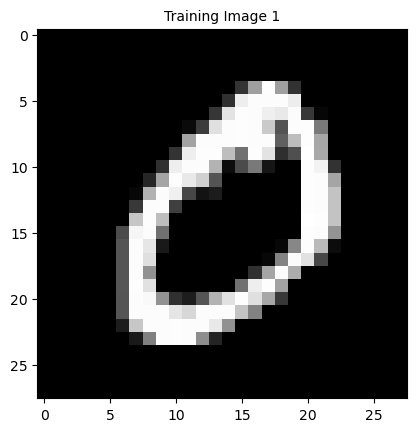

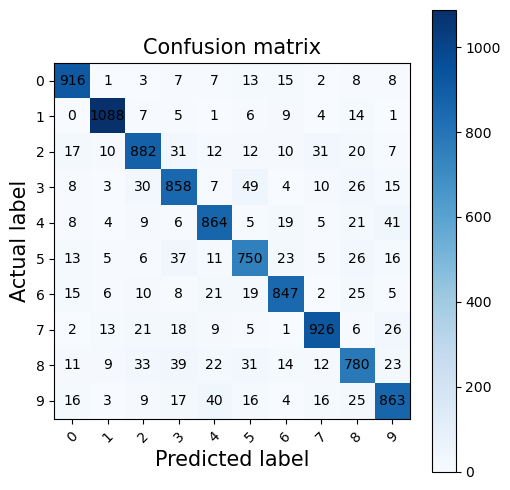

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import random

# Function to plot images
def plot_image(n_plots, plot_index, plot_image, pixel_hw, title_text, colors="gray"):
    plt.subplot(1, n_plots, plot_index)
    reshaped_image = plot_image.reshape(pixel_hw, pixel_hw)
    plt.imshow(reshaped_image, cmap=colors)
    plt.title(title_text, size=10)

# Load the training and testing datasets
df_train = pd.read_csv("C:\\Users\\nayif\\py3b_nayef_omer\\week10\\A5_mnist_train.csv")
df_test = pd.read_csv("C:\\Users\\nayif\\py3b_nayef_omer\\week10\\A5_mnist_test.csv")

# Check the last few rows of the training dataset
print(df_train.tail())

# Separate the features and labels for the training and testing datasets
X_train = df_train.iloc[:, 1:].values  # All columns except the first (pixel values)
y_train = df_train.iloc[:, 0].values   # First column is the label (digits)

X_test = df_test.iloc[:, 1:].values    # Same for the test dataset
y_test = df_test.iloc[:, 0].values

# Check the shape of the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Rescale the pixel values (0-255) to range (0-1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the dataset by displaying the first image
plot_image(1, 1, X_train[0], 28, "Training Image 1")

# Train a model (example: Decision Tree Classifier)
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
def create_confusion_matrix(y_true, y_pred, num_classes, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, size=15)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, [str(i) for i in range(num_classes)], rotation=45, size=10)
    plt.yticks(tick_marks, [str(i) for i in range(num_classes)], size=10)
    plt.tight_layout()
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

# Display confusion matrix
create_confusion_matrix(y_test, y_pred, 10)
plt.show()


### 2. Split data into features, labels, training and testing

The first column in the data you loaded are the true labels. 

To get all columns except the first for each row in the training dataset you can type this: `df_train.iloc[:, 1:]`. Convert that to a numpy array by using `np.array()`. Save the result to a variable (you can name it `X_train`) and do the same thing for the testing data (you can name this variable `X_test`).

To get only the first column, meaning the labels, you can type this: `df_train.iloc[:, 0]`. Do the same as with the features, converting the data to a numpy array and saving the training labels to one variable and the testing labels to another (you can call them `y_train` and `y_test`).

In [4]:
# Separate the features (all columns except the first) and labels (the first column)
X_train = np.array(df_train.iloc[:, 1:])  # Features for training
y_train = np.array(df_train.iloc[:, 0])   # Labels for training

X_test = np.array(df_test.iloc[:, 1:])    # Features for testing
y_test = np.array(df_test.iloc[:, 0])     # Labels for testing

# Verify by checking the shape of the features and labels
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (59999, 784)
y_train shape: (59999,)
X_test shape: (9999, 784)
y_test shape: (9999,)


### 3. Displaying some numbers

In step 2 of part one we looked at how to display images using the function `plot_image()`. Do the same thing now, but for `X_train` instead of `images_demo_array`.

Remember that the training data contains almost 60000 numbers, so if you try to display all of them you will be waiting a long time for them to show so select just a few (less that ten).

The width and height of the images are 28. 

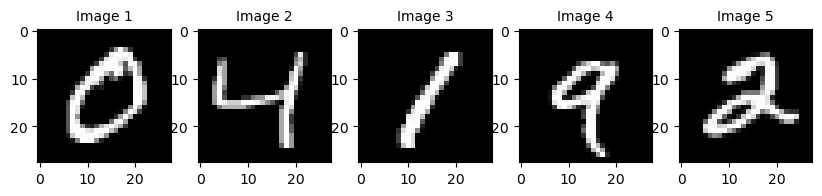

In [7]:
# Number of images to display (less than 10)
num_images_to_display = 5

# Set image size (28x28 pixels)
pixel_height_width = 28

# Display the first few images from X_train
plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    current_image = X_train[i, :]  # Select an image from the training data
    image_title = f"Image {i + 1}"
    plot_image(num_images_to_display, i + 1, current_image, pixel_height_width, image_title)

plt.show()  # Show the images


### 4. Scaling the values

The StandardScaler is used to standardize the features of our dataset. It transforms the data such that each feature has a mean of 0 and a standard deviation of 1.

This transforms the features of our dataset to have zero mean and unit variance, making the data more amenable for various machine learning algorithms. It facilitates fair comparisons between features, prevents issues with different feature scales, and aids in improving the stability and convergence of the learning process.

To create a scaler type `scaler = StandardScaler()` and then fit it on the training data features by using `scaler.fit()`.

When you have prepared the scaler you can scale the features by typing `scaled_data = scaler.transform(data_to_scale)`. Do this for both the training and test data.

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and scale it
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)

# Verify by checking the mean and standard deviation of the scaled data
print(f"Mean of X_train_scaled: {X_train_scaled.mean()}")
print(f"Standard deviation of X_train_scaled: {X_train_scaled.std()}")
print(f"Mean of X_test_scaled: {X_test_scaled.mean()}")
print(f"Standard deviation of X_test_scaled: {X_test_scaled.std()}")


Mean of X_train_scaled: 3.36108629306194e-18
Standard deviation of X_train_scaled: 0.9563162742139927
Mean of X_test_scaled: 0.0025069821277184457
Standard deviation of X_test_scaled: 0.9571669279523227


### 5. Gaussian Naive Bayes classification

Gaussian Naive Bayes a smart algorithm that looks at all the features of our data and tries to figure out what class it belongs to. It uses probability to do this. It looks at the training data which it already knows the answer for, and it learns how different features are related to each label.

So, when you show the model a new image with unknown label, it looks at the features and calculates the probability that it belongs to each class. Then, it chooses the label type with the highest probability as its guess.

Create a new classifier by typing `gaussian_classifier = GaussianNB()` then train it on the scaled training data and make predictions on the scaled testing data.

When you're done you can evaluate the model by using:

- `metrics.classification_report()` to generate a classification report showing precision, recall, f1-score and support for each class separately.
- `metrics.accuracy_score()` to evaluate the total accuracy for the model.
- `create_confusion_matrix()` (our function) to show a confusion matrix for the predicted labels.

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       980
           1       0.89      0.94      0.91      1135
           2       0.90      0.18      0.29      1032
           3       0.65      0.28      0.39      1010
           4       0.86      0.13      0.23       982
           5       0.45      0.03      0.06       892
           6       0.69      0.92      0.79       958
           7       0.88      0.20      0.32      1027
           8       0.25      0.70      0.37       974
           9       0.36      0.95      0.53      1009

    accuracy                           0.52      9999
   macro avg       0.67      0.52      0.47      9999
weighted avg       0.68      0.52      0.48      9999

Accuracy: 52.41%


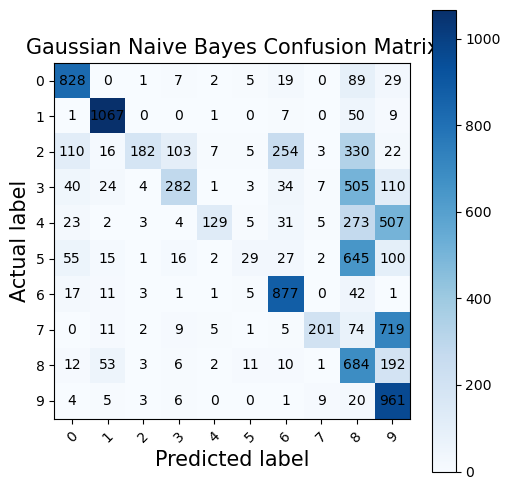

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Create the Gaussian Naive Bayes classifier
gaussian_classifier = GaussianNB()

# Train the classifier on the scaled training data
gaussian_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = gaussian_classifier.predict(X_test_scaled)

# Generate classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
create_confusion_matrix(y_test, y_pred, 10, title='Gaussian Naive Bayes Confusion Matrix')


### 6. Visualizing correct and incorrect predictions

Another way to get an understanding of how your model performs is to display a few of the test samples along with its label and its predicted label. 

To do this, create a loop that runs a set number of iterations (something like 8 iterations is a good start). In the loop you can use `random.randint(0, X_test.shape[0])` to get a random index from your test data. Use this to get the sample by using `X_test[random_index,:]`.

Get the correct label from the test data with `y_test[random_index]` and the predicted label from your predictions with `model_predictions[random_index]`.

Call the function `plot_image()` to show the random sample and add both the predicted label and the correct label in the image title. Remember that you can also set the last, optional, argument (`colors`) to `"Greens"` if the prediction was correct and `"Reds"` if it was incorrect.

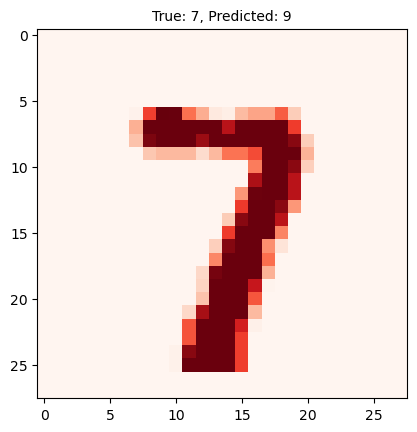

In [15]:
import random

# Number of iterations for displaying random predictions
num_samples = 8

# Loop through random test samples
for _ in range(num_samples):
    # Get a random index from the test data
    random_index = random.randint(0, X_test.shape[0] - 1)

    # Get the sample, true label, and predicted label
    image_sample = X_test[random_index, :]
    true_label = y_test[random_index]
    predicted_label = y_pred[random_index]

    # Set the title for the image
    title_text = f"True: {true_label}, Predicted: {predicted_label}"

    # Set the color (Green for correct, Red for incorrect prediction)
    colors = "Greens" if true_label == predicted_label else "Reds"

    # Plot the image using the plot_image function
    plot_image(1, 1, image_sample, 28, title_text, colors)


### 7. Neural networks

The most common approach to classifying images is using neural networks and now it's your turn to implement one type of neural network called a Multi Layer Perceptron (or MLP).

A Multi Layer Perceptron is a bit like a little brain. It's made up of many tiny parts called neurons, just like the brain has many tiny cells. Each neuron takes a piece of information (one or more features of our dataset) and decides if it's important for recognizing the image.

The neurons in the MLP are organized in layers. The first layer of neurons looks at the basic features of the object, like the shape or the color. Then, the information goes to the next layer, which looks at more complex features, like patterns or textures. Finally, the last layer makes the final decision of what class the image belongs to.

When we train this model we show it many examples of correctly labeled images of numbers. The model looks at these examples and adjusts the strength of the connections between the neurons. It tries to find the right settings so that when it sees a new object, the neurons work together to make the correct guess.

Later, when we show a new image, it goes through all the layers of neurons, each layer getting more and more complex information. Finally, the last layer tells the model what it thinks the object is based on all the information it received.

Create a new classifier by typing `MLP_classifier = MLPClassifier()` then train it on the scaled training data and make predictions on the scaled testing data.

When you're done you can evaluate the model by using:

- `metrics.classification_report()` to generate a classification report showing precision, recall, f1-score and support for each class separately.
- `metrics.accuracy_score()` to evaluate the total accuracy for the model.
- `create_confusion_matrix()` (our function) to show a confusion matrix for the predicted labels.

**Training a Multi Layer Perceptron is hard work for the computer and might take a few minutes. Jupyter Notebook will display an asterisk within square brackets the the cell is running (like this: `[*]`).**

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.93      0.99      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.96      0.97       958
           7       0.98      0.95      0.97      1027
           8       0.97      0.95      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97      9999
   macro avg       0.97      0.97      0.97      9999
weighted avg       0.97      0.97      0.97      9999

Accuracy: 0.9686


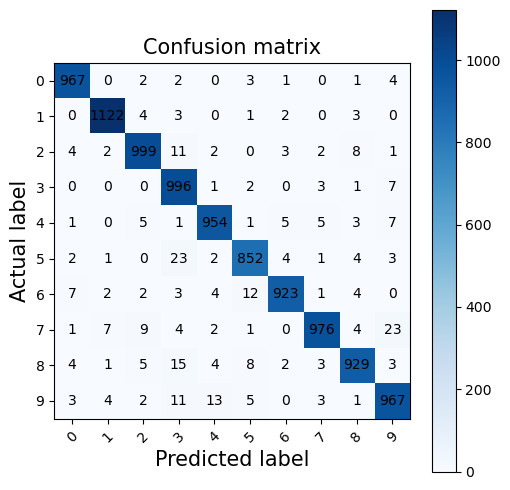

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import warnings
import os
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Step 1: Create the MLP Classifier
MLP_classifier = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=10, random_state=1)  # You can tweak the number of neurons and max_iter if needed.

# Step 2: Train the MLP model on the scaled training data
MLP_classifier.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the scaled testing data
MLP_predictions = MLP_classifier.predict(X_test_scaled)

# Step 4: Evaluate the model performance

# 1. Classification report showing precision, recall, f1-score, and support
print("Classification Report:")
print(metrics.classification_report(y_test, MLP_predictions))

# 2. Accuracy score for the model
accuracy = metrics.accuracy_score(y_test, MLP_predictions)
print(f"Accuracy: {accuracy:.4f}")

# 3. Confusion Matrix visualization using the create_confusion_matrix function
create_confusion_matrix(y_test, MLP_predictions, 10)  # 10 classes for MNIST


### 8. Visualizing the predictions

Now do the same type of visualization as you did on step 6. Visualize a few random numbers together with their predicted and correct values. Display them as green if the prediction was correct and red if it was incorrect.

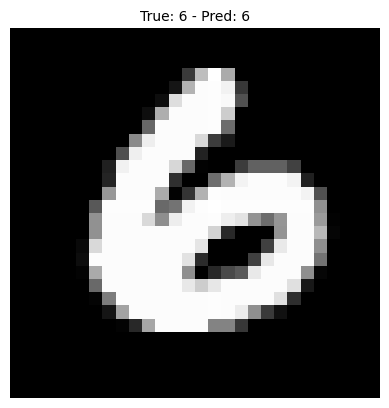

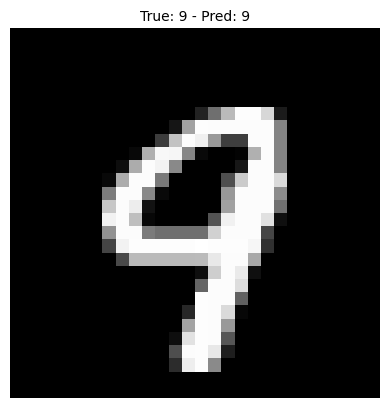

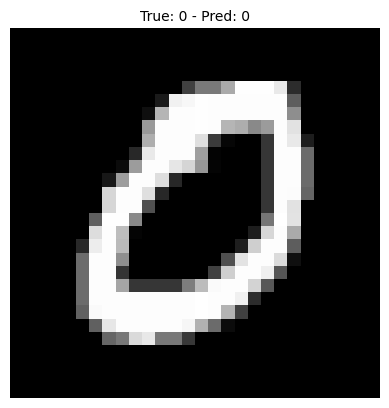

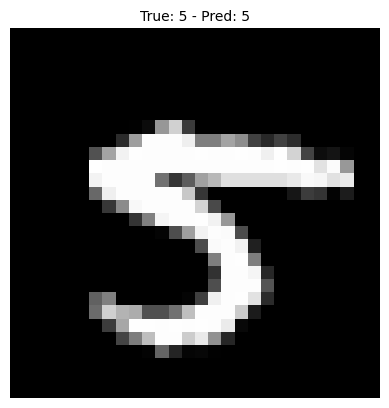

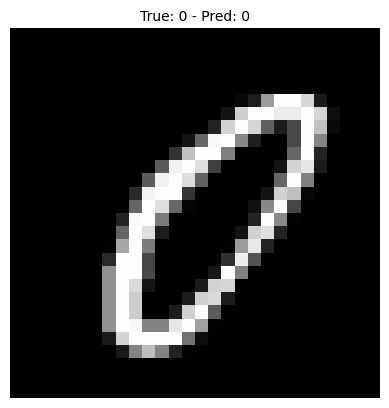

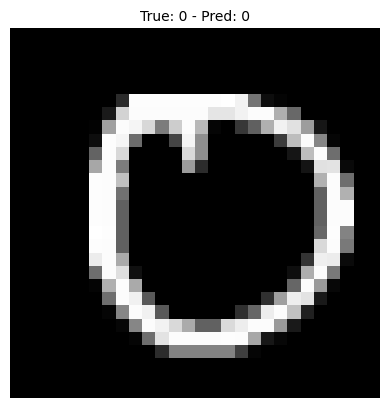

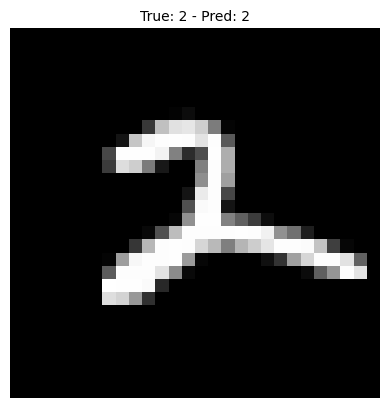

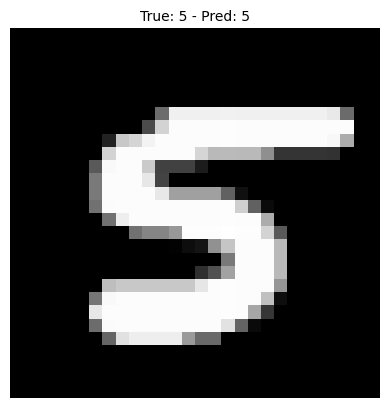

In [24]:
import random
import matplotlib.pyplot as plt

# Function to plot the image and labels
def plot_image(image, correct_label, predicted_label, colors='Greens'):
    plt.imshow(image.reshape(28, 28), cmap='gray')  # Reshape the image to 28x28 and display it
    plt.title(f"True: {correct_label} - Pred: {predicted_label}", fontsize=10)
    plt.axis('off')  # Turn off axis
    plt.show()

# Step 1: Visualize a few random predictions (8 iterations)
for _ in range(8):  # Change to the number of samples you want to visualize
    # Step 2: Get a random index from the test data
    random_index = random.randint(0, X_test.shape[0] - 1)
    
    # Step 3: Get the correct and predicted labels for that sample
    correct_label = y_test[random_index]
    predicted_label = MLP_predictions[random_index]
    
    # Step 4: Set the colors for correct (green) or incorrect (red) prediction
    if correct_label == predicted_label:
        colors = 'Greens'  # Correct prediction
    else:
        colors = 'Reds'  # Incorrect prediction
    
    # Step 5: Plot the image with the corresponding colors
    plot_image(X_test[random_index], correct_label, predicted_label, colors)


# Done!

Great job this far! I you completed the tasks above you are done with this course. Submit your work by pushing the changes to Github, inviting the teacher/s to your repository and submitting this link on ItsLearning under Assignment 5.

## Bonus assignments

If you want to learn more you can take a look at the bonus assignment about Tensorflow, which is the most common Python library for deep learning and neural networks. There's also a bonus assignment on doing the same type of image recognision as in this assignment, but on images of clothes instead of numbers.

**Thank you for attending this course and good luck with your future Programming and Machine Learning**